# Introduciton to Scikit-learn (sklearn)


This notebook demonstrates osme of the most useful functions of the beautiful scikit-learn library

What we will cover:
    
0. An end to end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorith for our problems
3. Fit the model and use it to make predictions on our data
4. Evaluate a model
5. Improve a model 
6. Save and load a trained model 
7. Putting it all together 

## 0. An end-to-end Scikit-learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (features matrix)
x = heart_disease.drop("target", axis =1)

# Create y (labels)
y = heart_disease["target"]

In [8]:
# 2. Choose the right model and hyperparameters 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
#3. Fit the model to the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
clf.fit(x_train, y_train);

In [27]:
# make a prediction
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [29]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [33]:
clf.score(x_test, y_test)

0.819672131147541

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.91      0.82      0.86        38

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61



In [31]:
print(confusion_matrix(y_test, y_preds))

[[20  3]
 [ 7 31]]


In [32]:
print(accuracy_score(y_test, y_preds))

0.8360655737704918


In [21]:
# 5. Improve the model 
# Try different amount of n_estimators

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")

Trying model with 10 estimators...
Trying model with 20 estimators...
Trying model with 30 estimators...
Trying model with 40 estimators...
Trying model with 50 estimators...
Trying model with 60 estimators...
Trying model with 70 estimators...
Trying model with 80 estimators...
Trying model with 90 estimators...


In [34]:
# 5. Improve the model 
# Try different amount of n_estimators

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 75.41%
 
Trying model with 20 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 30 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 40 estimators...
Model accuracy on test set: 80.33%
 
Trying model with 50 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 60 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 70 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 80 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 90 estimators...
Model accuracy on test set: 83.61%
 


In [6]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_1", "wb"))

NameError: name 'clf' is not defined

In [35]:
loaded_model = pickle.load(open('random_forest_1', "rb"))

loaded_model.score(x_test, y_test)

0.8360655737704918

## 1. Getting our data ready to be used with machine learning


Three main things we have to do:

    1. Split the data into features and labels (usually 'x' & 'y')
    2. Filling (imputing) or disregarding missing values 
    3. Converting non-numerical values to numerical values (feature encoding)

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [13]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

NameError: name 'x' is not defined

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [13]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
len(car_sales)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [4]:
car_sales.dtypes


Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [9]:
# Split into X/Y 
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test set 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [10]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [14]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [15]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [16]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [18]:
# Let's refit the model 
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)


model.fit(x_train, y_train)

RandomForestRegressor()

In [19]:
model.score(x_test, y_test)

0.3235867221569877

### 1.2 Handling missing values and NaN

1. Fill them with some values (also known as imputation)
2. Remove the samples with missing data altogether

In [25]:
# Import car sales missing data
missing_data = pd.read_csv('data/car-sales-extended-missing-data.csv') 
missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [27]:
missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
missing_x = missing_data.drop("Price", axis=1)
missing_y = missing_data["Price"]

In [31]:
# Let's try to convert the missing data to numbers
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(missing_x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [32]:
missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with pandas

In [34]:
# Fill the "Make" column
missing_data["Make"].fillna('missing', inplace=True)

# Fill the "Colour" column
missing_data["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" column
missing_data["Odometer (KM)"].fillna(missing_data["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
missing_data["Doors"].fillna(4, inplace=True)

In [35]:
# Check out our dataframe
missing_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
# Remove rows with missing "Price" value
missing_data.dropna(inplace=True)
missing_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [37]:
missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [38]:
len(missing_data)

950

In [43]:
missing_x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [45]:
# Let's try to convert the missing data to numbers
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(missing_data)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with scikit-learn

In [46]:
extended_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
extended_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
extended_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
extended_missing.dropna(subset=["Price"], inplace=True)
extended_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
# Split into x and y
x = extended_missing.drop("Price", axis=1)
y = extended_missing["Price"]

In [50]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("numerical_imputer", numerical_imputer, num_features)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [51]:
filled_list = pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

filled_list.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [52]:
filled_list.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
# Let's try to convert the missing data to numbers
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<950x16 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

## 2. Choosing the right estimator/algorithm for your problem

Things to note: 

    -SKlearn refers to machine learning models, algorithms as estimators 
    -Classification problem - predicting a category (heart disease or not)
        -(clf as a classification estimator)
    -Regression problem - predicting a number (selling price of a car)
    
    https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [8]:
### 2.1 picking a machine learning model for a regression problem

# Get California Housing dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [14]:
housing_df['target'] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [15]:
housing_df = housing_df.drop('MedHouseValue', axis=1)
housing_df

KeyError: "['MedHouseValue'] not found in axis"

In [16]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup Random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df['target'] #median house price in $100,000 

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.5758549611440131

In [16]:
## Ensemble model 
# Ensemble is a combination of smaller models
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data

# Split into train and test sets

# Create Random Forest model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the model
model.score(x_test, y_test)

0.8051230593157366

In [18]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
## Linear SVC import estimator class

from sklearn.svm import LinearSVC

# Setup random seed 
np.random.seed(42)

# Make the data
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.2)

# Instantiate linear svc
clf = LinearSVC()
clf.fit(x_train,y_train)

# Evaluate Linear SVC
clf.score(x_test, y_test)

0.8688524590163934

In [21]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [22]:
## Linear SVC import estimator class

from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# Make the data
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluate RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

If you have structured data, use ensemble methods

If you have unstructured data, use deep learning or transfer learning 

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data


### Different Names for:
#### 'x' = features, feature variables, data
#### 'y' = labels, targets, target variables


In [4]:
## Linear SVC import estimator class

from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# Make the data
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(x_train,y_train)

# Evaluate RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

In [24]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Make predictions using a machine learning model 

## 2 ways to make predictions:
    1. predict()
    2. predict_proba()

In [26]:
# Use a trained model to make predictions
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [28]:
# Compare predictions to truth labels 
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

In [30]:
# Predict with predict_proba

#Predict Proba returns probabilities of a classification label
clf.predict_proba(x_test)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [17]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
x = housing_df.drop("target", axis=1)
y=housing_df["target"]

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create the model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(x_train, y_train)

# Make Predictions
y_preds = model.predict(x_test)

In [19]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [20]:
# Compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

## 4.0 Evaluating a machine learning model 

Three ways to evaluate sklearn models:

    1. Estimators built in `score()` method
    2. The scoring parameter
    3. Problem-specific metric functions


## 4.1 Evaluating a model with the score method

In [24]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create x & y
x = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

# Create train/test 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create Classifier model instance
model = RandomForestClassifier()

# Fit Classifier training data
model.fit(x_train, y_train)

# Score the model
model.score(x_test, y_test)

0.8524590163934426

## 4.2 Evaluating a model using the scoring parameter



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

# Create x & y
x = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

# Create train/test 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create Classifier model instance
model = RandomForestClassifier()

# Fit Classifier training data
model.fit(x_train, y_train)

# Score the model
model.score(x_test, y_test)

0.8524590163934426

In [27]:
cross_val_score(model, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [33]:
np.random.seed(42)

# Single training and test split score 
model_single_score = model.score(x_test, y_test)

# Take mean of 5-fold cross valitdation score
model_cross_val_score = np.mean(cross_val_score(model, x, y))

# Compare the two 
model_single_score, model_cross_val_score

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [30]:
# Scoring parameter set to NONE by default 
cross_val_score(model, x, y)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [34]:
# Default scoring parameter of a classifier = mean accuracy 
model.score(x_test, y_test)

0.8524590163934426

### 4.2.1 Evaluation Metrics 

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

## Accuracy

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

model = RandomForestClassifier()
cross_val = cross_val_score(model, x, y)

In [37]:
np.mean(cross_val)

0.8248087431693989

## Area under receiver operating characteristic curve (AUC/ROC)

1. Area under curve 
2. ROC curve

ROC curves are a comparison of a models true positive rate (TPR) versus a models false positive rate (FPR)

True positive = model predicts 1 when truth is 1

False positive = model predicts 1 when truth is 0

True negative = model predicts 0 when truth is 0

False negative = model predicts 0 when truth is 1

In [11]:
# Create train/test 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.metrics import roc_curve


# Fit the classifier 
model.fit(x_train, y_train)

# Make Predictions with probabilities
y_probs= model.predict_proba(x_test)


In [18]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [14]:
# Calculate the fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates 
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

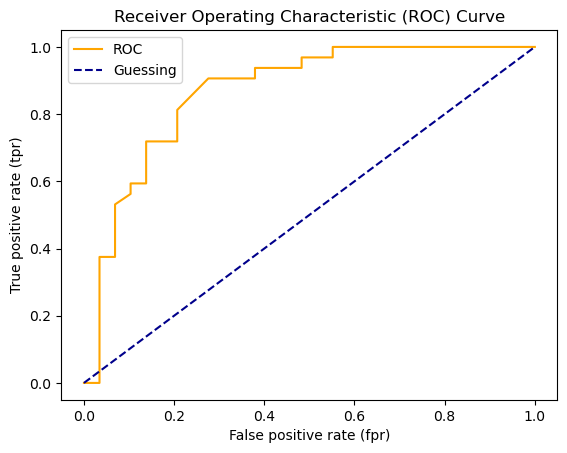

In [17]:
# Create a function for plotting ROC curves

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr) 
    and true positive rate (tpr) or a model.    
    '''
    # Plot ROC curve 
    plt.plot(fpr,tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize a plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)   

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

### Confusion Matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

Giving you an idea of where the model is getting confused


In [21]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]])

In [22]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=['Predicted Labelss'])

Predicted Labelss,0,1
Actual Label,,
0,24,5
1,8,24


<Axes: >

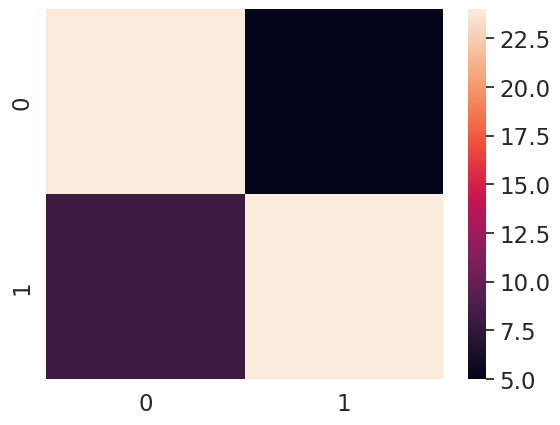

In [23]:
# Make our confusion matrix more visual with Seaborns Heatmap
import seaborn as sns

# Set font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

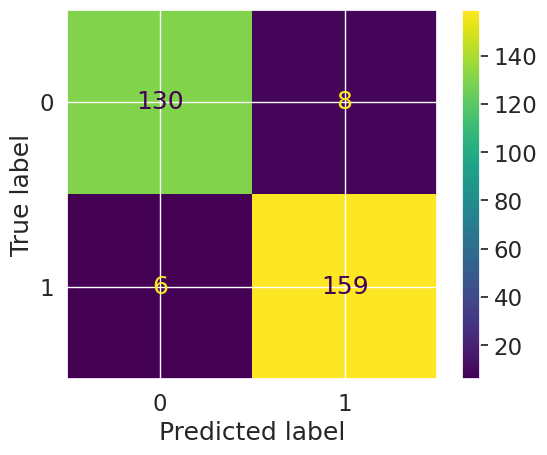

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x, y)



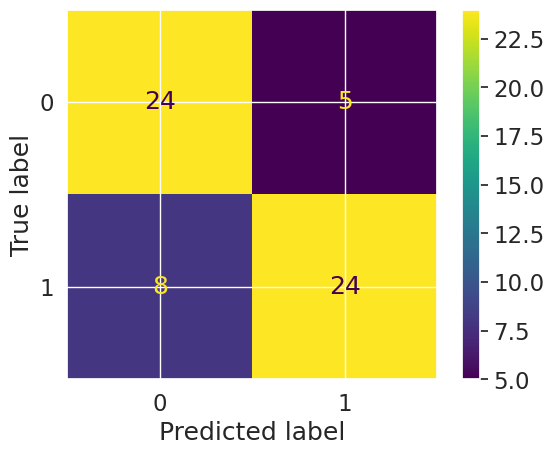

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)